In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
sns.set_style("darkgrid")
data = pd.read_csv('arbitrage_data.tsv', names=['spread', 'star_buy_price', 'start_sell_price', 'end_buy_price', 'end_sell_price', 'date_start', 'date_end',
                                                'ticker', 'exchange_buy', 'exchnage_sell'])
data['date_start'] = data['date_start'].apply(lambda x: datetime.fromtimestamp(x))
data['date_end'] = data['date_end'].apply(lambda x: datetime.fromtimestamp(x))
data['total_time'] = [date_end - date_start for date_start, date_end in zip(data['date_start'].values, data['date_end'].values)]
data['total_time'] = data['total_time'].apply(lambda x: x.total_seconds())
dt = datetime.fromisoformat('2022-11-01 23:59:59')
data = data.loc[(data['date_start'] <= dt) & ((data['exchange_buy'] == 'binance') | (data['exchange_buy'] == 'lbank2'))]
data

,spread,star_buy_price,start_sell_price,end_buy_price,end_sell_price,date_start,date_end,ticker,exchange_buy,exchnage_sell,total_time
0,42.334,2.975000e-02,5.100000e-02,2.268000e-02,2.276000e-02,2022-11-01 00:00:00,2022-11-23 04:01:00,MDT/USDT,binance,mexc,1915260.0
351,1.252,3.900000e-07,3.939000e-07,3.900000e-07,3.935000e-07,2022-11-01 00:01:00,2022-11-01 00:26:00,LINA/BTC,binance,huobi,1500.0
352,2.260,3.800000e-07,3.886000e-07,3.900000e-07,3.886000e-07,2022-11-01 06:08:00,2022-11-01 06:32:00,LINA/BTC,binance,huobi,1440.0
353,2.260,3.800000e-07,3.886000e-07,3.900000e-07,3.886000e-07,2022-11-01 06:34:00,2022-11-01 06:38:00,LINA/BTC,binance,huobi,240.0
354,2.160,3.800000e-07,3.882000e-07,3.900000e-07,3.882000e-07,2022-11-01 07:00:00,2022-11-01 07:15:00,LINA/BTC,binance,huobi,900.0
...,...,...,...,...,...,...,...,...,...,...,...
970860,1.010,1.970100e-02,1.990000e-02,1.970600e-02,1.990000e-02,2022-11-01 12:24:00,2022-11-01 12:24:00,SAITO/USDT,lbank2,bitrue,0.0
970861,1.040,1.969500e-02,1.990000e-02,1.988600e-02,1.990000e-02,2022-11-01 12:27:00,2022-11-01 12:28:00,SAITO/USDT,lbank2,bitrue,60.0
970862,44.612,1.990400e-02,2.100000e-02,1.359700e-02,2.720000e-02,2022-11-01 13:01:00,2022-11-09 16:03:00,SAITO/USDT,lbank2,bitrue,702120.0
970869,6.390,4.813100e-04,5.000000e-04,5.165200e-04,5.000000e-04,2022-11-01 00:00:00,2022-11-01 04:31:00,HOKK/USDT,lbank2,whitebit,16260.0


In [3]:
data_trades = pd.read_csv('arbitrage_trade_data.tsv', names=['spread', 'star_buy_price', 'start_sell_price', 'end_buy_price', 'end_sell_price', 'date_start', 'date_end',
                                                'ticker', 'exchange_buy', 'exchnage_sell'])
data_trades['date_start'] = data_trades['date_start'].apply(lambda x: datetime.fromtimestamp(x))
data_trades['date_end'] = data_trades['date_end'].apply(lambda x: datetime.fromtimestamp(x))
data_trades['total_time'] = [date_end - date_start for date_start, date_end in zip(data_trades['date_start'].values, data_trades['date_end'].values)]
data_trades['total_time'] = data_trades['total_time'].apply(lambda x: x.total_seconds())
data_trades

,spread,star_buy_price,start_sell_price,end_buy_price,end_sell_price,date_start,date_end,ticker,exchange_buy,exchnage_sell,total_time
0,1.007,7.9676,8.0480,7.9688,8.0480,2022-11-01 13:44:14.695,2022-11-01 13:44:26.786,APT/USDT,binance,lbank2,12.091
1,1.000,7.9686,8.0480,7.9699,8.0480,2022-11-01 13:44:16.963,2022-11-01 13:44:26.786,APT/USDT,binance,lbank2,9.823
2,1.144,7.9603,8.0479,7.9687,8.0479,2022-11-01 13:45:05.879,2022-11-01 13:45:25.184,APT/USDT,binance,lbank2,19.305
3,1.060,7.9635,8.0479,7.9699,8.0479,2022-11-01 13:45:23.585,2022-11-01 13:45:25.184,APT/USDT,binance,lbank2,1.599
4,1.546,7.9567,8.0479,7.9496,8.0211,2022-11-01 13:45:24.600,2022-11-01 13:55:58.380,APT/USDT,binance,lbank2,633.780
...,...,...,...,...,...,...,...,...,...,...,...
1769,1.420,0.2110,0.2140,0.2120,0.2140,2022-11-01 22:06:42.087,2022-11-01 22:06:54.810,AUDIO/USDT,binance,lbank2,12.723
1770,1.420,0.2110,0.2140,0.2110,0.2130,2022-11-01 22:20:01.161,2022-11-01 22:21:09.580,AUDIO/USDT,binance,lbank2,68.419
1771,3.310,0.2110,0.2180,0.0000,0.0000,2022-11-01 22:22:51.806,2022-11-01 22:45:42.950,AUDIO/USDT,binance,lbank2,1371.144
1772,1.020,0.2756,0.2784,0.2766,0.2772,2022-11-01 00:39:25.349,2022-11-01 00:39:45.268,LRC/USDT,binance,lbank2,19.919


Как мы видим средний спред у датасета с трейдами меньше

In [4]:
print(data.loc[data['spread'] < 50]['spread'].mean(), data_trades['spread'].mean(), sep='\t\t')

1.7091494680851063		1.3071054114994363


Среднее время длительности ситуации сильно различается

In [5]:
print(data.loc[data['spread'] < 50]['total_time'].mean(), data_trades['total_time'].mean(), sep='\t\t')

4405.095744680851		1593.600890078918


# График зависимости спреда от его количества.

<AxesSubplot: >

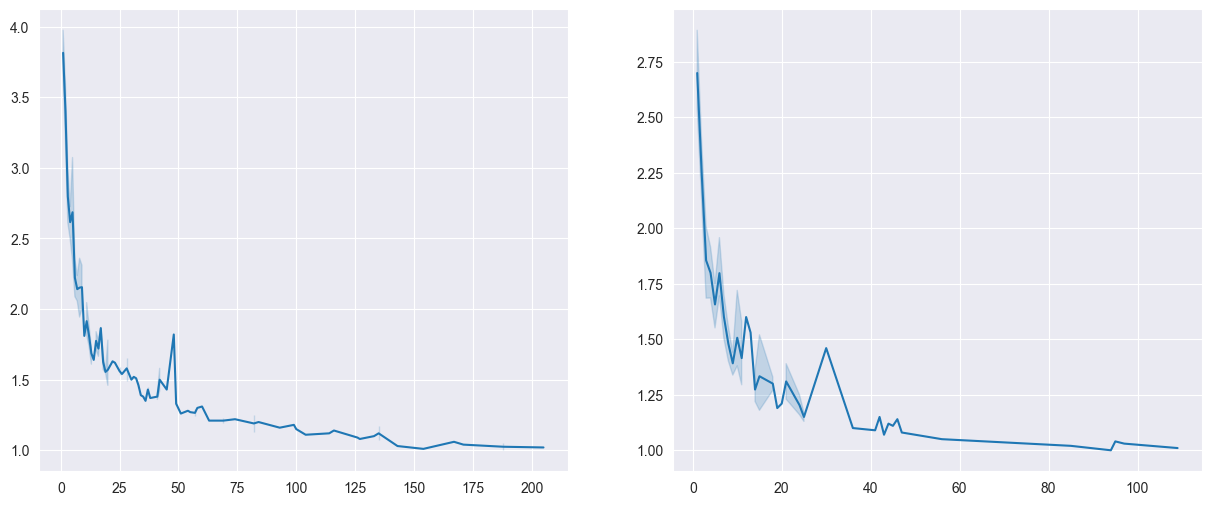

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot (1, 2, 1)
data['spread_float'] = data.loc[data['spread'] < 5]['spread'].apply(lambda x: round(x, 2))
values = data['spread_float'].value_counts()
sns.lineplot(x=values.values, y=values.index)
plt.subplot (1, 2, 2)
data_trades['spread_float'] = data_trades.loc[data_trades['spread'] < 5]['spread'].apply(lambda x: round(x, 2))
values = data_trades['spread_float'].value_counts()
sns.lineplot(x=values.values, y=values.index)

# График зависимости количества ситуаций от времени суток.

<AxesSubplot: xlabel='groups'>

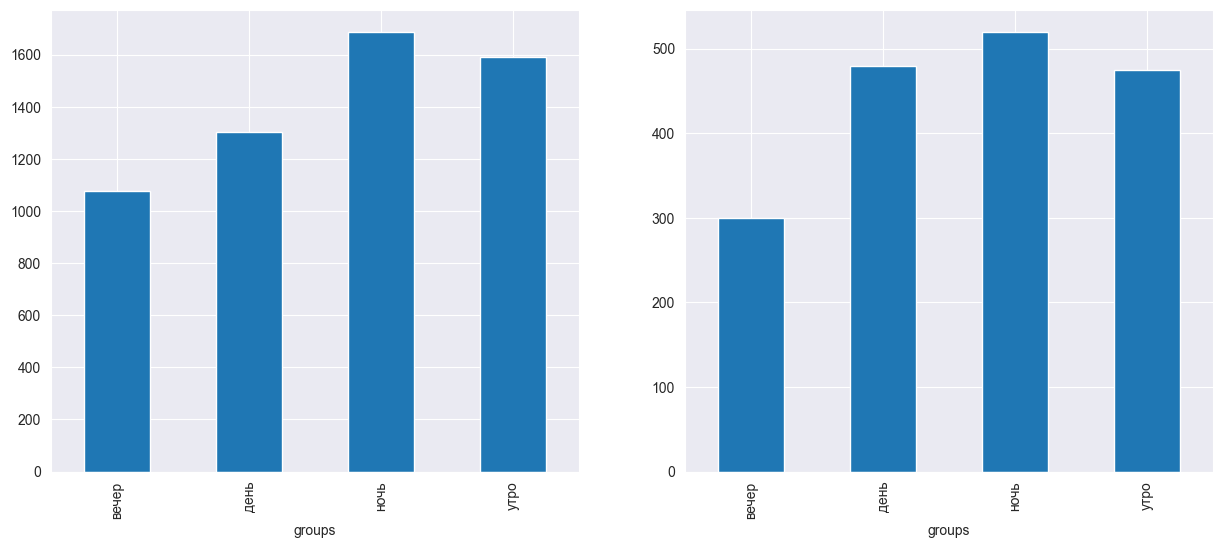

In [7]:
def obr(x):
    if x.hour >= 18:
        return 'вечер'
    elif 12 <= x.hour < 18:
        return 'день'
    elif 6 <= x.hour < 12:
        return 'утро'
    else:
        return 'ночь'

plt.figure(figsize=(15, 6))
plt.subplot (1, 2, 1)
data['groups'] = data['date_start'].apply(obr)
values = data.groupby('groups')['spread'].count()
values.plot.bar(x='groups', y='spread')

plt.subplot (1, 2, 2)
data_trades['groups'] = data_trades['date_start'].apply(obr)
values = data_trades.groupby('groups')['spread'].count()
values.plot.bar(x='groups', y='spread')

Изуча эти данные, можно сказать, что собранные ситуации на поминутных дынных могут быть не реализуемыми, из-за неликвидности рынка. Поэтому перед их реальной реализацией следует проверять ликвидность.